## 1. Teorema Fondamentale del Calcolo Integrale (Teorema di Torricelli-Barrow)

**Obiettivo:** Verificare numericamente il legame tra l'operazione di integrazione e quella di derivazione.

### 1.1 Enunciato Teorico

Sia $f:I \subseteq R \rightarrow R$ una funzione continua su un intervallo $I \subseteq R$. Sia $a \in I$ punto fissato.La funzione integrale $F:I \subset R \rightarrow R$ è definita come:

\begin{equation} 
F(x)=\int_a^x f(t) dt, \forall x \in I 
\end{equation}


In questo caso, $dom f=I$.



**Il Teorema Fondamentale del Calcolo afferma che:**

1. $F(x)$ è derivabile $\forall x \in (a,b)$.
2. La derivata di $F(x)$ coincide con la funzione integranda valutata in $x$:
   \begin{equation}
   \frac{d}{dx} F(x) = f(x), \forall x \in (a,b)
   \end{equation}



---

## 2. Definizione Formale e Approssimazione Numerica

### 2.1 L'Integrale di Riemann

Sia $f:[a,b]\rightarrow R$ una funzione continua. Per il teorema di integrabilità delle funzioni continue, l'integrale definito esiste ed è il limite comune delle somme superiori e inferiori. Numericamente, approssimiamo l'integrale di Riemann mediante una partizione uniforme dell'intervallo $[a,x]$ in n sottointervalli, ciascuno di ampiezza:
\begin{equation} 
\Delta t = \frac{x-a}{n}
\end{equation}

I punti della partizione sono definiti come $t_i=a+i\Delta t$ per $i=0,\cdots,n$. La funzione integrale F(x) viene approssimata tramite la somma di Riemann destra:

\begin{equation} F(x)=\int_a^x f(t) dt \approx i=1 \sum\limits_{i=1}^n f(t_i)\Delta t\end{equation}

### 2.2 Rapporto Incrementale e Derivata

Il Teorema Fondamentale del Calcolo ci dice che la velocità con cui l'area F(x) aumenta quando spostiamo l'estremo x è esattamente pari al valore della funzione f in quel punto. In simboli:
\begin{equation} F'(x)=f(x)\end{equation}

Per verificare questa uguaglianza, calcoleremo il rapporto incrementale della nostra funzione area F(x) e vedremo se il risultato coincide con il valore di f(x) originario.





---

## 3. Implementazione e Analisi dei Risultati

Scegliamo come test una funzione $f(x):f \in C^\infty$per garantire la massima regolarità:

Ad esempio,
\begin{equation} 
f(x) = sin(x)-\frac{1}{2}x
\end{equation} 

La sua primitiva analitica (a meno di una costante) è: \begin{equation}F(x) = -cos(x) + 0.25x^2\end{equation}

Definiamo il dominio di calcolo $x \in [0,5]$

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Configurazione grafica
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 100

In [24]:
def f(x):
    return np.sin(x) + 0.5 * x

In [25]:
# Parametri del dominio
a = 0      # estremo inferiore
b = 5      # estremo superiore
n = 1000   # numero di punti


x = np.linspace(a, b, n)
dx = x[1] - x[0]  # passo di integrazione

print(f"Intervallo: [{a}, {b}]")
print(f"Numero punti: {n}")
print(f"Passo dx: {dx:.6f}")

Intervallo: [0, 5]
Numero punti: 1000
Passo dx: 0.005005


### 3.2 Calcolo della Funzione Integrale F(x)

Calcoliamo $F(x)=\int_a^x f(t)dt $ mediante la funzione di accumulazione (np.cumsum), che implementa la somma di Riemann:

In [26]:
F = np.cumsum(f(x)) * dx

print(f"F(x) calcolata su {len(F)} punti")
print(f"F({a}) = {F[0]:.6f} (dovrebbe essere ≈ 0)")
print(f"F({b}) = {F[-1]:.6f}")

F(x) calcolata su 1000 punti
F(0) = 0.000000 (dovrebbe essere ≈ 0)
F(5) = 6.970193


### 3.3 Verifica della Derivata

Calcoliamo la derivata numerica della funzione integrale e confrontiamola con la funzione originale f(x).

In [27]:
F_der = np.gradient(F, dx)

print(f"F'(x) calcolata")
print(f"Confronto con f(x):")
print(f"  f(2.5) = {f(2.5):.6f}")
print(f"  F'(2.5) = {F_der[len(F_der)//2]:.6f}")

F'(x) calcolata
Confronto con f(x):
  f(2.5) = 1.848472
  F'(2.5) = 1.846956


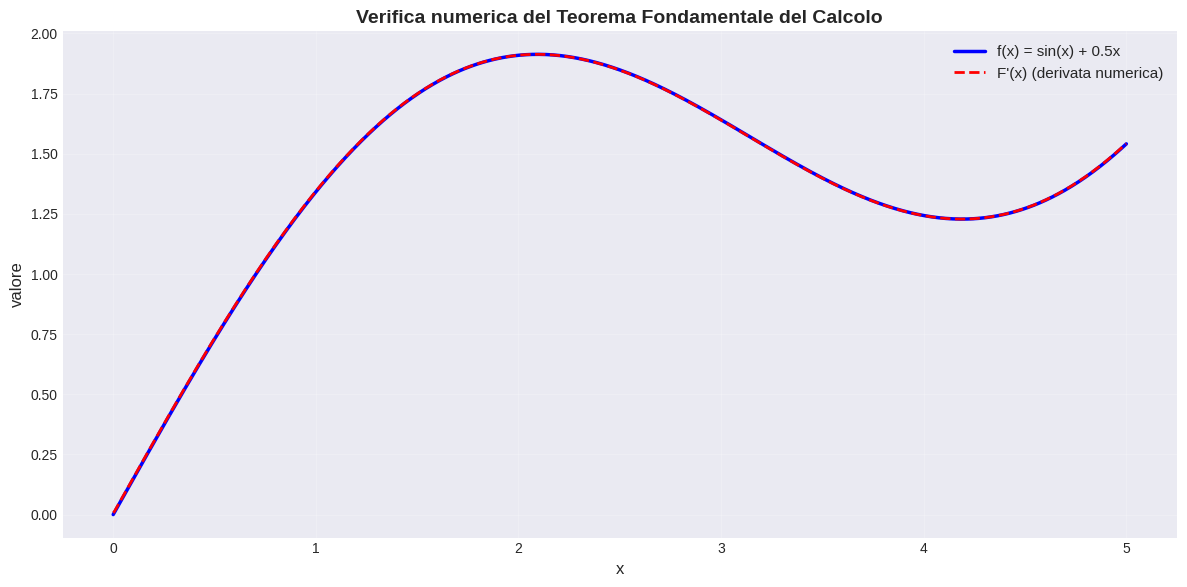

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(x, f(x), label="f(x) = sin(x) + 0.5x", linewidth=2.5, color='blue')
plt.plot(x, F_der, '--', label="F'(x) (derivata numerica)", linewidth=2, color='red')

plt.title("Verifica numerica del Teorema Fondamentale del Calcolo", 
          fontsize=14, fontweight='bold')
plt.xlabel("x", fontsize=12)
plt.ylabel("valore", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

Dall'analisi dell'errore del metodo dei rettangoli e delle differenze finite, ci aspettiamo che l'errore totale sia legato alla dimensione del passo $\Delta x$.

In [29]:
errore = np.abs(f(x) - F_der)


print(f"Errore medio:    {np.mean(errore):.8f}")
print(f"Errore massimo:  {np.max(errore):.8f}")
print(f"Errore minimo:   {np.min(errore):.8f}")
print(f"Deviazione std:  {np.std(errore):.8f}")


Errore medio:    0.00145914
Errore massimo:  0.00750749
Errore minimo:   0.00000000
Deviazione std:  0.00111145


I risultati numerici mostrano che $\forall x \in domf$, $F'(x)\rightarrow f(x)$ per $\Delta x \rightarrow 0$, confermando sperimentalmente la tesi del Teorema Fondamentale del Calcolo Integrale.

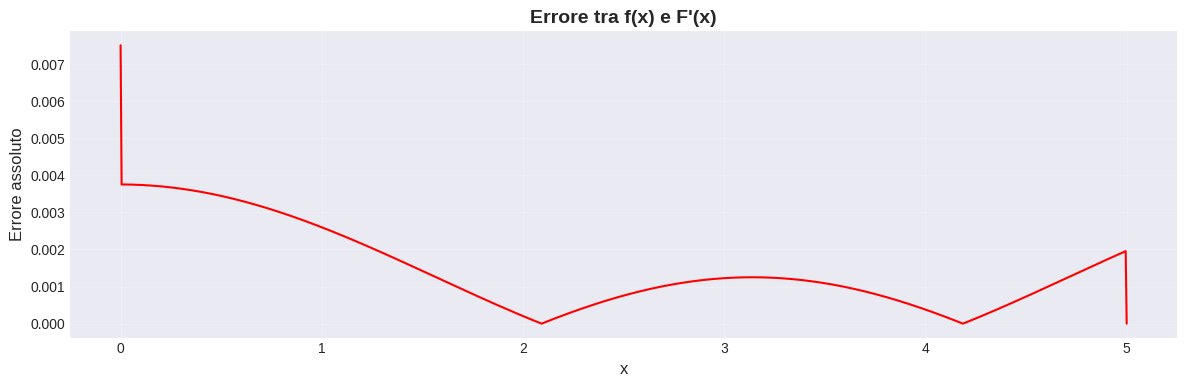

In [30]:
plt.figure(figsize=(12, 4))

plt.plot(x, errore, color="red", linewidth=1.5)
plt.title("Errore tra f(x) e F'(x)", fontsize=14, fontweight='bold')
plt.xlabel("x", fontsize=12)
plt.ylabel("Errore assoluto", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

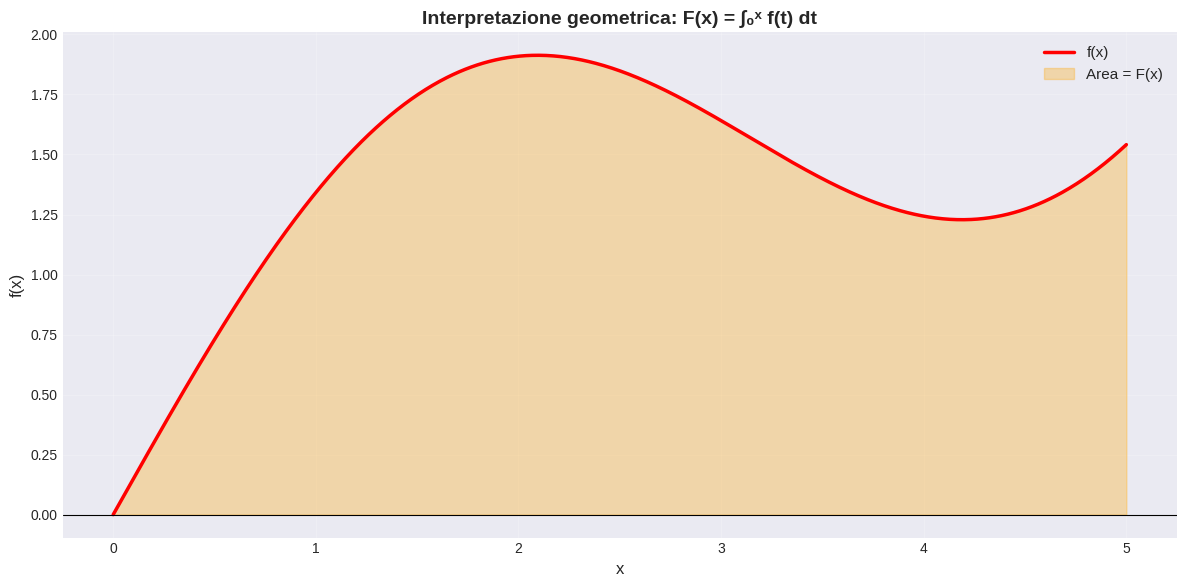

In [31]:
plt.figure(figsize=(12, 6))

plt.plot(x, f(x), label="f(x)", linewidth=2.5, color='red')
plt.fill_between(x, f(x), alpha=0.3, color='orange', 
                 label="Area = F(x)")

plt.title("Interpretazione geometrica: F(x) = ∫₀ˣ f(t) dt", 
          fontsize=14, fontweight='bold')
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linewidth=0.8)
plt.tight_layout()

plt.show()

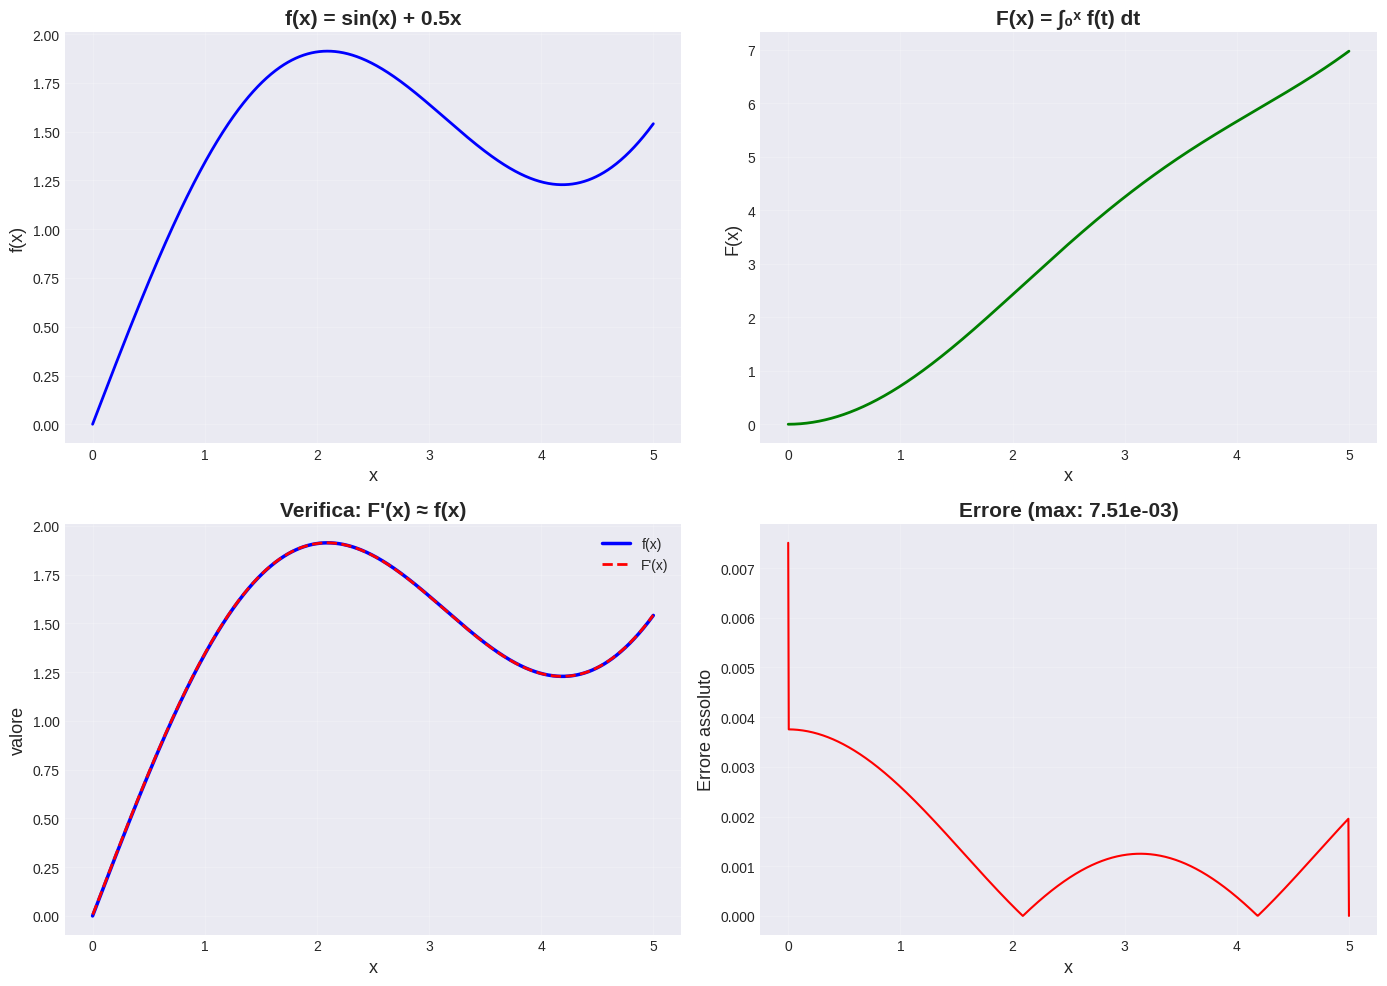

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(x, f(x), linewidth=2, color='blue')
axes[0, 0].set_title("f(x) = sin(x) + 0.5x", fontweight='bold')
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("f(x)")
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(x, F, linewidth=2, color='green')
axes[0, 1].set_title("F(x) = ∫₀ˣ f(t) dt", fontweight='bold')
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("F(x)")
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(x, f(x), label="f(x)", linewidth=2.5, color='blue')
axes[1, 0].plot(x, F_der, '--', label="F'(x)", linewidth=2, color='red')
axes[1, 0].set_title("Verifica: F'(x) ≈ f(x)", fontweight='bold')
axes[1, 0].set_xlabel("x")
axes[1, 0].set_ylabel("valore")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(x, errore, color='red', linewidth=1.5)
axes[1, 1].set_title(f"Errore (max: {np.max(errore):.2e})", fontweight='bold')
axes[1, 1].set_xlabel("x")
axes[1, 1].set_ylabel("Errore assoluto")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()